In [13]:
import sys
import os
import pandas as pd
import pickle 
import numpy as np

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from portfolio_analysis_and_optimization import (calculate_portfolio_return, calculate_portfolio_volatility,portfolio_statistics, generate_random_portfolios, 
plot_efficient_frontier,optimize_portfolio, display_optimal_portfolio,create_portfolio_dataframe,calculate_annual_returns,clean_data,
calculate_covariance_matrix,optimize_portfolio,calculate_var,plot_cumulative_returns,summarize_portfolio_performance,calculate_daily_returns,download_data,)

In [4]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

data = download_data(tickers, start_date, end_date)
data = clean_data(data)

[*********************100%***********************]  3 of 3 completed
c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_11\Time-Series-Forecasting-for-Portfolio-Management-Optimization-\scripts\portfolio_analysis_and_optimization.py:159: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


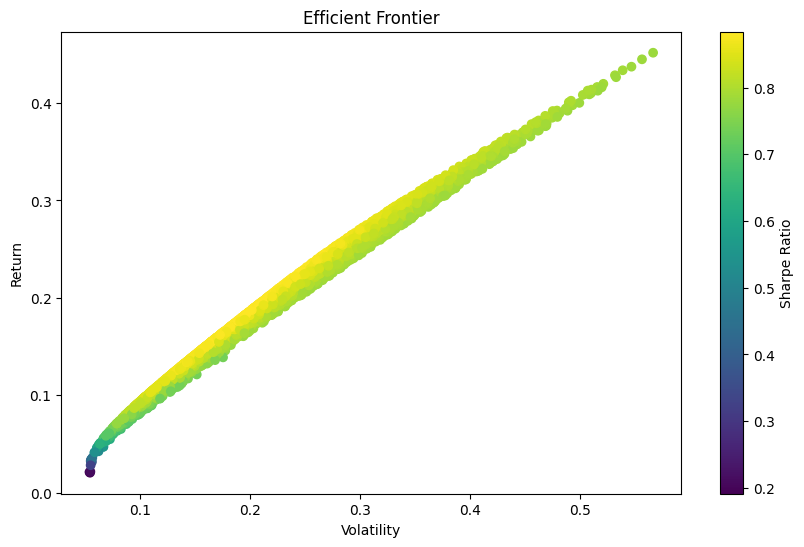

In [5]:
returns = calculate_daily_returns(data)
num_portfolios = 5000  # Number of random portfolios to simulate
results, weight_matrix = generate_random_portfolios(num_portfolios, returns)
plot_efficient_frontier(results)

In [6]:
optimal_weights = optimize_portfolio(returns)
display_optimal_portfolio(optimal_weights, returns)

TypeError: optimize_portfolio() missing 2 required positional arguments: 'cov_matrix' and 'initial_weights'

In [14]:

with open("../data/forecast.pkl", "rb") as f:
    tsla_forecast = pickle.load(f)

In [15]:
if isinstance(tsla_forecast, np.ndarray):
    tsla_forecast = pd.DataFrame(tsla_forecast, columns=['Close'])
print(tsla_forecast.head()) 

      Close
0  2.258091
1  0.059380
2  0.066267
3  0.066281
4  0.066281


In [16]:
df = create_portfolio_dataframe(tsla_forecast)
df

,TSLA
0,2.258091
1,0.059380
2,0.066267
3,0.066281
4,0.066281
...,...
360,0.066281
361,0.066281
362,0.066281
363,0.066281


In [17]:
annual_returns, daily_returns = calculate_annual_returns(df)
annual_returns

TSLA   -0.593666
dtype: float32

In [18]:
cov_matrix = calculate_covariance_matrix(daily_returns)
cov_matrix

,TSLA
TSLA,0.666119


In [19]:
initial_weights = np.array([1.0])
optimal_weights = optimize_portfolio(annual_returns, cov_matrix, initial_weights)
optimal_weights

array([1.])

In [20]:
summary = summarize_portfolio_performance(optimal_weights, annual_returns, cov_matrix)
print(summary)

╒════════════════════════╤═══════════╕
│ Metric                 │     Value │
╞════════════════════════╪═══════════╡
│ Expected Annual Return │ -0.593666 │
├────────────────────────┼───────────┤
│ Annualized Volatility  │  0.816161 │
├────────────────────────┼───────────┤
│ Sharpe Ratio           │ -0.751893 │
├────────────────────────┼───────────┤
│ Optimal Weights        │  1        │
╘════════════════════════╧═══════════╛
{'Expected Annual Return': np.float64(-0.5936658978462219), 'Annualized Volatility': np.float64(0.8161612296571908), 'Sharpe Ratio': np.float64(-0.7518929784302273), 'Optimal Weights': array([1.])}


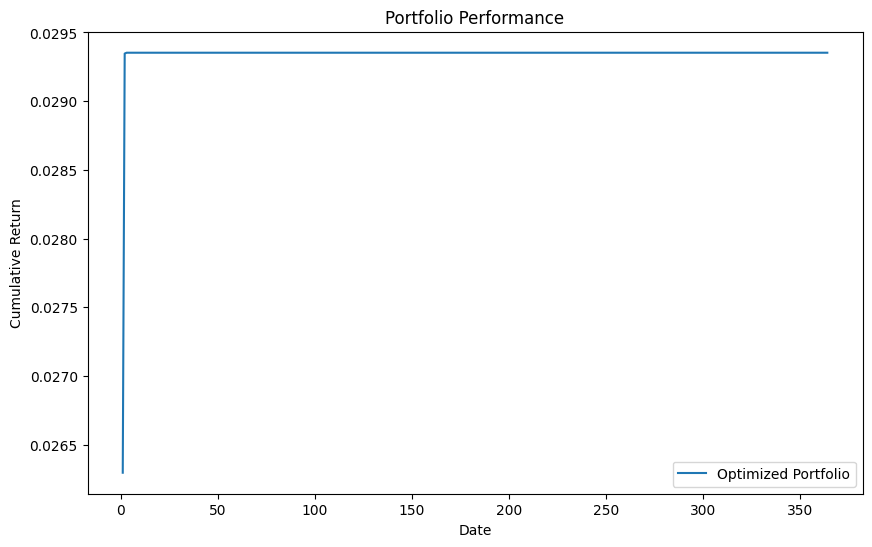

In [21]:
plot_cumulative_returns(daily_returns, optimal_weights)

In [22]:
VaR_TSLA = calculate_var(daily_returns)
print(f"Value at Risk (VaR) for TSLA at 95% confidence: {VaR_TSLA}")

Value at Risk (VaR) for TSLA at 95% confidence: -0.08221157500439864
